**TEXT ANALYTICS**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

train_ds = pd.read_csv("training.txt", delimiter="\t")
train_ds.head(5)

,Sentiment,Text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


Printing the first 5 positive sentiment documents.

In [2]:
pd.set_option('max_colwidth', 800)
train_ds[train_ds.Sentiment == 1][0:5]

,Sentiment,Text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


Printing the first 5 negative sentiment documents.

In [3]:
train_ds[train_ds.Sentiment == 0][0:5]

,Sentiment,Text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  6918 non-null   int64 
 1   Text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


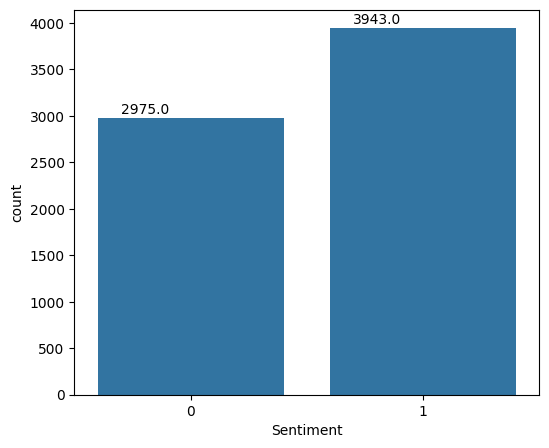

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure(figsize=(6, 5))
ax = sn.countplot(x='Sentiment', data=train_ds)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.1, p.get_height() + 50))

plt.show()

**TEXT PRE-PROCESSING**

**Bag-of-Words (BoW) Model**

There are three ways to identify the importance of words in a BoW model:

1. Count Vector Model
2. Term Frequency Vector Model
3. Term Frequency-Inverse Document Frequency (TF-IDF) Model

***Creating Count Vectors for train Dataset***

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(train_ds.Text)

# Get the feature names
features = feature_vector.get_feature_names_out()
print("Total number of features: ", len(features))

Total number of features:  2132


In [7]:
import random

random.sample(features.tolist(), 10)

['takes',
 'cake',
 'kanye',
 'page',
 'brokeback',
 'cuz',
 'selfish',
 'nasy',
 'begin',
 'clips']

In [8]:
train_ds_features = count_vectorizer.transform(train_ds.Text)
type(train_ds_features)

scipy.sparse._csr.csr_matrix

In [9]:
train_ds_features.shape

(6918, 2132)

In [10]:
train_ds_features.getnnz()

65398

In [11]:
print("Density of the matrix: ", train_ds_features.getnnz() * 100 / (train_ds_features.shape[0] * train_ds_features.shape[1]))

Density of the matrix:  0.4434010415225908


***Displaying Document Vectors***

In [12]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())

# Setting the column names to the features i.e. words
train_ds_df.columns = features

In [13]:
train_ds[0:1]

,Sentiment,Text
0,1,The Da Vinci Code book is just awesome.


In [14]:
train_ds_df.iloc[0:1, 150:157]
train_ds_df[['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome']][0:1]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1


***Removing Low-frequency Words***

In [15]:
# Summing up the occurrences of features column wise
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count_df = pd.DataFrame(dict(features = features, counts = features_count))

Text(0, 0.5, 'Density')

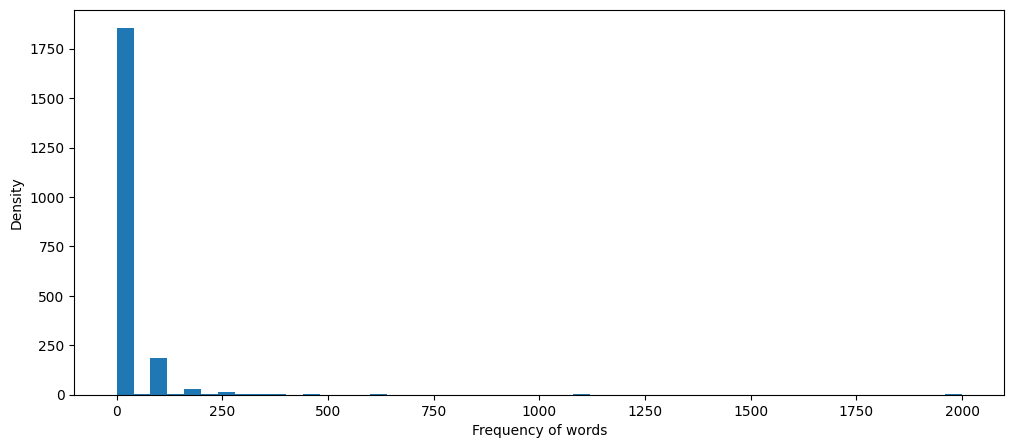

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(features_count_df.counts, bins=50, range=(0, 2000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [17]:
len(features_count_df[features_count_df.counts == 1])

1228

In [18]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)

# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit(train_ds.Text)

# Get the feature names
features = feature_vector.get_feature_names_out()

# Transform the document into vectors
train_ds_features = count_vectorizer.transform(train_ds.Text)

# Count the frequency of the features
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count = pd.DataFrame(dict(features = features, counts = features_count))

In [19]:
features_count.sort_values('counts', ascending=False)[0:15]

,features,counts
858,the,3306
49,and,2154
379,harry,2093
705,potter,2093
150,code,2002
190,da,2001
926,vinci,2001
616,mountain,2000
116,brokeback,2000
576,love,1624


***Removing Stop Words***

In [20]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS

# Printing first few stop words
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['ever', 'seeming', 'everyone', 'hereupon', 'something', 'them', 'serious', 'one', 'nor', 'our']


In [21]:
# Adding custom words to the list of stop words
my_stop_words = list(text.ENGLISH_STOP_WORDS.union(['harry', 'potter', 'code', 'vinci', 'da', 'mountain', 'movie', 'movies']))

***Creating Count Vectors***

In [22]:
# Setting stop words list
count_vectorizer = CountVectorizer(stop_words = my_stop_words, max_features = 100)

feature_vector = count_vectorizer.fit(train_ds.Text)
train_ds_features = count_vectorizer.transform(train_ds.Text)
features = feature_vector.get_feature_names_out()
features_count = np.sum(train_ds_features.toarray(), axis = 0)
features_count = pd.DataFrame(dict(features = features, counts = features_count))

In [23]:
features_count.sort_values("counts", ascending = False)[0:15]

,features,counts
9,brokeback,2000
48,love,1624
1,awesome,1127
55,mission,1094
40,impossible,1093
46,like,974
82,sucks,602
81,sucked,600
36,hate,578
66,really,374


In [24]:
from nltk.stem.snowball import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

# Custom function for stemming and stop word removal
def stemmed_words(doc):
    # Stemming of words
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]

    # Remove the words in stop words list
    non_stop_words = [word for word in stemmed_words if word not in my_stop_words]

    return non_stop_words

In [25]:
count_vectorizer = CountVectorizer(analyzer=stemmed_words, max_features=1000)

feature_vector = count_vectorizer.fit(train_ds.Text)
train_ds_features = count_vectorizer.transform(train_ds.Text)
features = feature_vector.get_feature_names_out()
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count = pd.DataFrame(dict(features = features, counts = features_count))
features_count.sort_values("counts", ascending=False)[0:15]

,features,counts
408,harri,2093
97,brokeback,2000
652,love,1883
891,suck,1484
950,wa,1176
623,like,1155
721,movi,1149
59,awesom,1130
715,mission,1094
499,imposs,1093


***Distribution of Words Across Different Sentiment***

Let us consider the word *awesome*

In [26]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())

# Assign the features names to the column
train_ds_df.columns = features

# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = train_ds.Sentiment

<Axes: xlabel='sentiment', ylabel='awesom'>

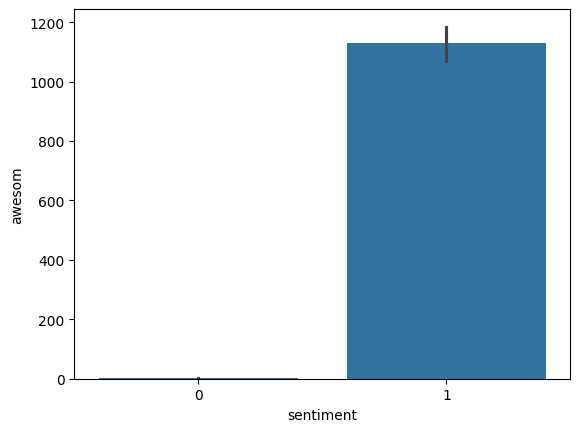

In [27]:
sn.barplot(x='sentiment', y='awesom', data=train_ds_df, estimator=sum)

Now we check for the word *realli*

<Axes: xlabel='sentiment', ylabel='realli'>

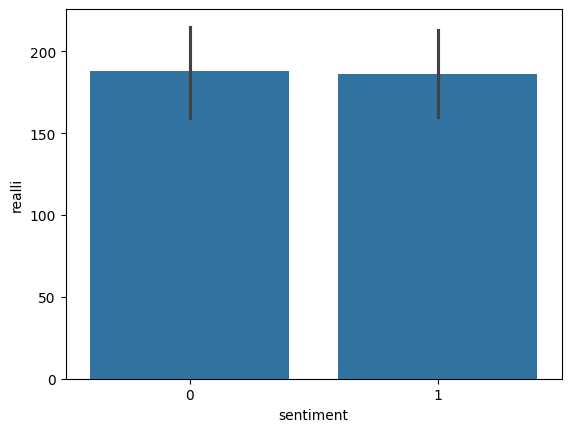

In [28]:
sn.barplot(x='sentiment', y='realli', data=train_ds_df, estimator=sum)

How about the word *hate*

<Axes: xlabel='sentiment', ylabel='hate'>

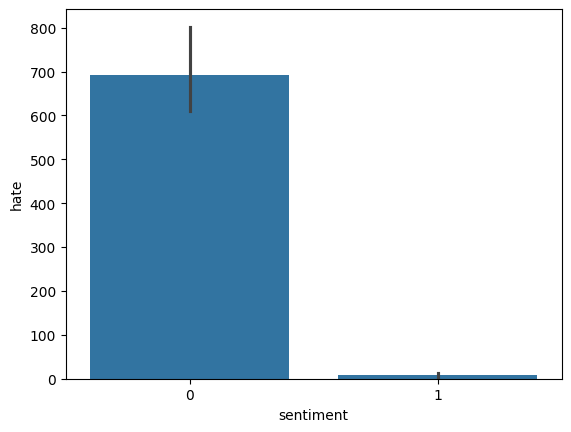

In [29]:
sn.barplot(x='sentiment', y='hate', data=train_ds_df, estimator=sum)

**NAIVE-BAYES MODEL FOR SENTIMENT CLASSIFICATION**

**Split the Dataset**

In [30]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_ds_features, train_ds.Sentiment, test_size=0.3, random_state=42)

**Build Naive-Bayes Model**

In [31]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(), train_y)

BernoulliNB()

**Make Prediction on Test Case**

In [32]:
test_ds_predicted = nb_clf.predict(test_X.toarray())

**Finding Model Accuracy**

In [33]:
from sklearn import metrics

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



Now we shall draw the confusion matrix

<Axes: >

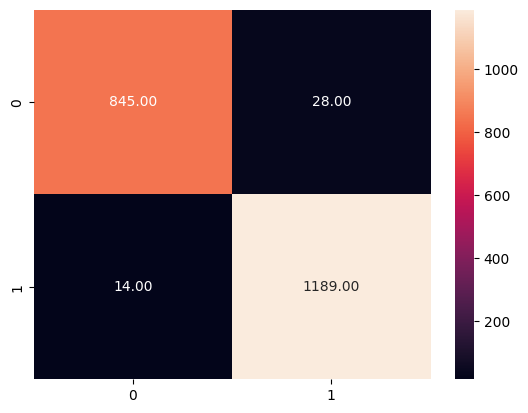

In [34]:
cm = metrics.confusion_matrix(test_y, test_ds_predicted)
sn.heatmap(cm, annot=True, fmt='.2f')

**USING TF-IDF VECTORIZER**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=stemmed_words, max_features=1000)
feature_vector = tfidf_vectorizer.fit(train_ds.Text)
train_ds_features = tfidf_vectorizer.transform(train_ds.Text)
features = feature_vector.get_feature_names_out()

For TF-IDF we can assume that it is distributed according to Gaussian distribution. So we can implement the Gaussian Naive-Bayes to classify these documents.

In [36]:
from sklearn.naive_bayes import GaussianNB

train_X, test_X, train_y, test_y = train_test_split(train_ds_features, train_ds.Sentiment, test_size=0.3, random_state=42)

In [37]:
nb_clf = GaussianNB()
nb_clf.fit(train_X.toarray(), train_y)

GaussianNB()

In [38]:
test_ds_predicted = nb_clf.predict(test_X.toarray())
print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.96      0.96      2076
weighted avg       0.97      0.97      0.97      2076



**CHALLENGES OF TEXT ANALYTICS**

**Using n-Grams**

In [47]:
import nltk
# nltk.download('punkt')
from nltk.stem import PorterStemmer
# Library for regular expressions
import re

stemmer = PorterStemmer()

def get_stemmed_tokens(doc):
    
    # Tokenize the documents to words
    all_tokens = [word for word in nltk.word_tokenize(doc)]
    clean_tokens = []

    # Remove all characters other than alphabets. It takes a regex for matching.
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
            clean_tokens.append(each_token)

    # Stem the words
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english', tokenizer=get_stemmed_tokens, ngram_range=(1, 2))

feature_vector = tfidf_vectorizer.fit(train_ds.Text)
train_ds_features = tfidf_vectorizer.transform(train_ds.Text)
features = feature_vector.get_feature_names_out()

**Build the Model with n-Grams**

In [49]:
train_X, test_X, train_y, test_y = train_test_split(train_ds_features, train_ds.Sentiment, test_size=0.3, random_state=42)

nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(), train_y)
test_ds_predicted = nb_clf.predict(test_X.toarray())
print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       873
           1       0.96      1.00      0.98      1203

    accuracy                           0.97      2076
   macro avg       0.98      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076

